# 와인 품질 예측하기


![](https://labelyourdata.com/img/article-illustrations/ml_essential_tool.jpg)

## 1.환경준비

### (1) 라이브러리 로딩

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense, Input
from keras.backend import clear_session
from keras.optimizers import Adam

* 함수 만들기

In [ ]:
# 학습곡선 함수
def dl_history_plot(history):
    plt.figure(figsize=(10,6))
    plt.plot(history['loss'], label='train_err', marker = '.')
    plt.plot(history['val_loss'], label='val_err', marker = '.')

    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid()
    plt.show()

### (2) 데이터로딩

In [ ]:
path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/winequality-white.csv"
data = pd.read_csv(path)
data['quality'] = np.where(data['quality'] == 3, 4, np.where(data['quality'] == 9, 8, data['quality']))
data['quality'] = data['quality'] - 4
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,2
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,2
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,2
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,2
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,2


* 범주가 5개 입니다.
    * 0 - 최하  ~  4 - 최상

In [ ]:
data['quality'].value_counts()

,count
quality,
2,2198
1,1457
3,880
0,183
4,180


## 2.데이터 준비

### (1) 데이터 준비
* y에 대한 전처리 : 위에서 이미 0 ~ 4로 범주를 맞췄습니다.
* x, y 나누기

In [ ]:
target = 'quality'
x = data.drop(target, axis = 1)
y = data.loc[:, target]

### (2) 데이터 분할

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.3, random_state=20)

### (3) 스케일링

In [ ]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

In [ ]:
nfeatures = x_train.shape[1]
nfeatures

11

## 3.모델링

최소 3개 이상의 모델을 생성하고 성능을 비교하시오.

### (1) 모델1

In [ ]:
clear_session()

model1 = Sequential([Input(shape = (nfeatures,)),
                   Dense(3, activation ='relu'),
                   Dense(5, activation = 'softmax')])

model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 3)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │            20 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56 (224.00 B)

 Trainable params: 56 (224.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model1.compile(optimizer = Adam(learning_rate = 0.01), loss = 'sparse_categorical_crossentropy')

history = model1.fit(x_train, y_train, validation_split = 0.3, epochs= 50, verbose = 0).history

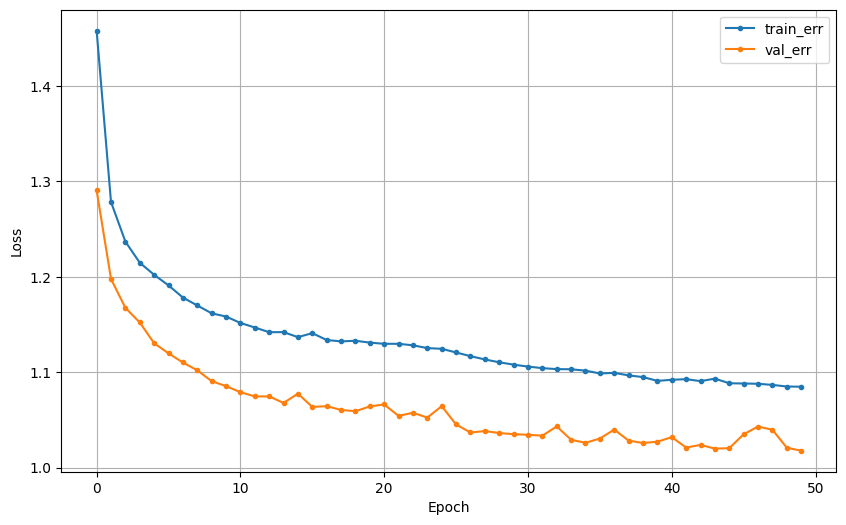

In [ ]:
dl_history_plot(history)

In [ ]:
pred1= model1.predict(x_val)
pred1[:5]
pred1_class = pred1.argmax(axis = 1)
pred1_class[:5]

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


array([2, 2, 2, 2, 2])

In [ ]:
print(confusion_matrix(y_val, pred1_class))
print(classification_report(y_val, pred1_class, digits=4))

[[  3  39  19   0   0]
 [  0 249 188   1   0]
 [  0 147 475  38   0]
 [  0  15 194  41   0]
 [  0   6  44  11   0]]
              precision    recall  f1-score   support

           0     1.0000    0.0492    0.0938        61
           1     0.5461    0.5685    0.5570       438
           2     0.5163    0.7197    0.6013       660
           3     0.4505    0.1640    0.2405       250
           4     0.0000    0.0000    0.0000        61

    accuracy                         0.5224      1470
   macro avg     0.5026    0.3003    0.2985      1470
weighted avg     0.5126    0.5224    0.4807      1470



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### (2) 모델2

In [ ]:
clear_session()

model2 = Sequential([Input(shape = (nfeatures,)),
                   Dense(6, activation ='relu'),
                   Dense(3, activation = 'relu'),
                  Dense(5, activation = 'softmax')])

model2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 6)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │            21 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │            20 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 113 (452.00 B)

 Trainable params: 113 (452.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model2.compile(optimizer = Adam(learning_rate = 0.01), loss = 'sparse_categorical_crossentropy')

history = model2.fit(x_train, y_train, validation_split = 0.3, epochs= 50, verbose = 0).history

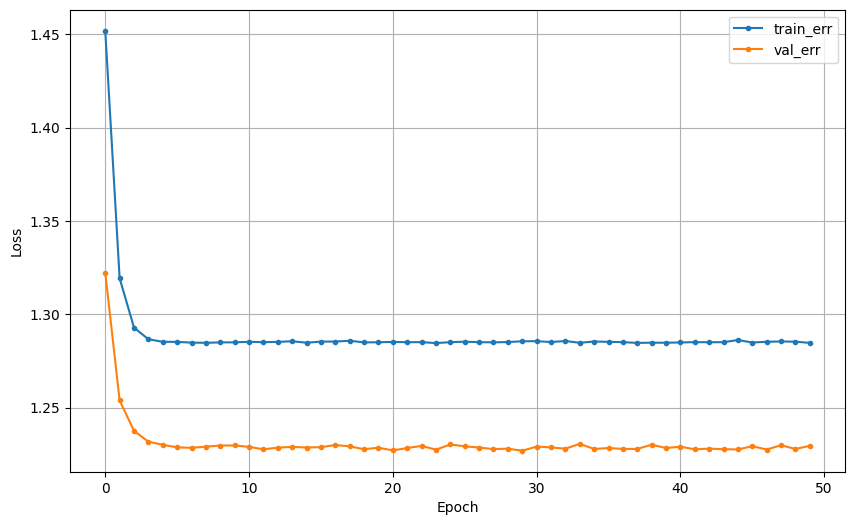

In [ ]:
dl_history_plot(history)

In [ ]:
pred2= model2.predict(x_val)
pred2[:5]
pred2_class = pred2.argmax(axis = 1)
pred2_class[:5]

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


array([2, 2, 2, 2, 2])

In [ ]:
print(confusion_matrix(y_val, pred2_class))
print(classification_report(y_val, pred2_class, digits=4))

[[  0   0  61   0   0]
 [  0   0 438   0   0]
 [  0   0 660   0   0]
 [  0   0 250   0   0]
 [  0   0  61   0   0]]
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000        61
           1     0.0000    0.0000    0.0000       438
           2     0.4490    1.0000    0.6197       660
           3     0.0000    0.0000    0.0000       250
           4     0.0000    0.0000    0.0000        61

    accuracy                         0.4490      1470
   macro avg     0.0898    0.2000    0.1239      1470
weighted avg     0.2016    0.4490    0.2782      1470



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### (3) 모델3

In [ ]:
clear_session()

model3 = Sequential([Input(shape = (nfeatures,)),
                   Dense(8, activation ='relu'),
                   Dense(6, activation ='relu'),
                   Dense(3, activation = 'relu'),
                  Dense(5, activation = 'softmax')])

model3.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │            54 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            21 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │            20 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 191 (764.00 B)

 Trainable params: 191 (764.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model3.compile(optimizer = Adam(learning_rate = 0.01), loss = 'sparse_categorical_crossentropy')

history = model3.fit(x_train, y_train, validation_split = 0.3, epochs= 50, verbose = 0).history

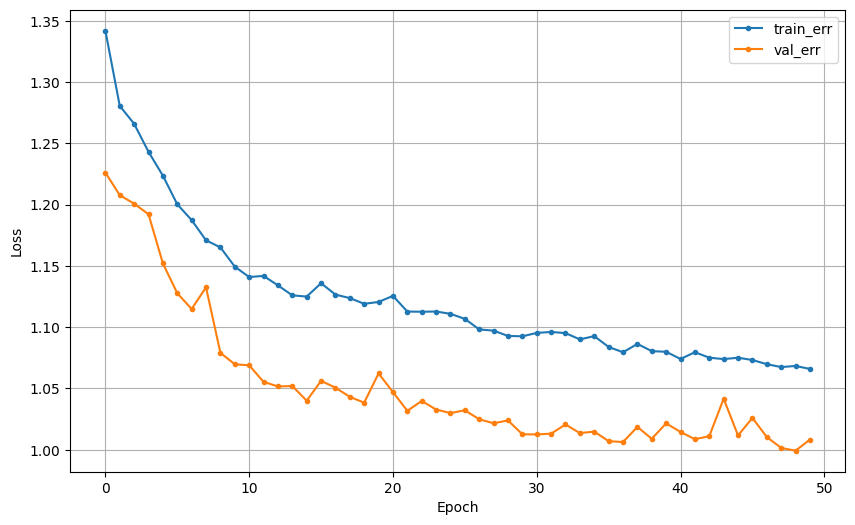

In [ ]:
dl_history_plot(history)

In [ ]:
pred3= model3.predict(x_val)
pred3[:5]
pred3_class = pred3.argmax(axis = 1)
pred3_class[:5]

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([2, 2, 2, 2, 2])

In [ ]:
print(confusion_matrix(y_val, pred3_class))
print(classification_report(y_val, pred3_class, digits=4))

[[  2  40  19   0   0]
 [  0 277 158   3   0]
 [  0 149 448  63   0]
 [  0   3 169  78   0]
 [  0   0  37  24   0]]
              precision    recall  f1-score   support

           0     1.0000    0.0328    0.0635        61
           1     0.5906    0.6324    0.6108       438
           2     0.5391    0.6788    0.6009       660
           3     0.4643    0.3120    0.3732       250
           4     0.0000    0.0000    0.0000        61

    accuracy                         0.5476      1470
   macro avg     0.5188    0.3312    0.3297      1470
weighted avg     0.5385    0.5476    0.5179      1470



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
